## Final Plots

In [5]:
from scipy import stats
def permutation_spearmanr(x, y, alternative='two-sided', n_permutations=100000):
    """
    Perform a permutation test for Spearman's correlation.

    Parameters:
    x (array-like): Input array for the first variable.
    y (array-like): Input array for the second variable.
    alternative (str): Defines the alternative hypothesis. 
                       Default is 'two-sided'. Options: 'two-sided', 'greater', 'less'.
    n_permutations (int): Number of permutations for the permutation test. Default is 10000.

    Returns:
    tuple: Spearman correlation coefficient and p-value.
    """
    # Define the statistic function for the permutation test
    def spearman_statistic(x, y):
        return stats.spearmanr(x, y).correlation
    
    # Perform the permutation test
    result = stats.permutation_test((x, y), spearman_statistic, 
                                    alternative=alternative, 
                                    permutation_type='pairings',
                                    n_resamples=n_permutations)
    
    # Calculate the observed Spearman correlation
    spearman_corr = spearman_statistic(x, y)
    
    return spearman_corr, result.pvalue


C:\Users\james\anaconda3\lib\site-packages\scipy\stats\_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Viscosity vs Error:
Correlation Coefficient: -0.19402925288408715
P-value: 0.028539714602853972

Diffusivity vs Error:
Correlation Coefficient: -0.47613761215894523
P-value: 1.999980000199998e-05

Amplitude vs Error:
Correlation Coefficient: 0.1603129005676616
P-value: 0.07115928840711593

X_R vs Error:
Correlation Coefficient: -0.4166876487822743
P-value: 1.999980000199998e-05

Z_R vs Error:
Correlation Coefficient: 0.048640358908624795
P-value: 0.5871741282587174

Z_C vs Error:
Correlation Coefficient: 0.1047141091375206
P-value: 0.24093759062409376



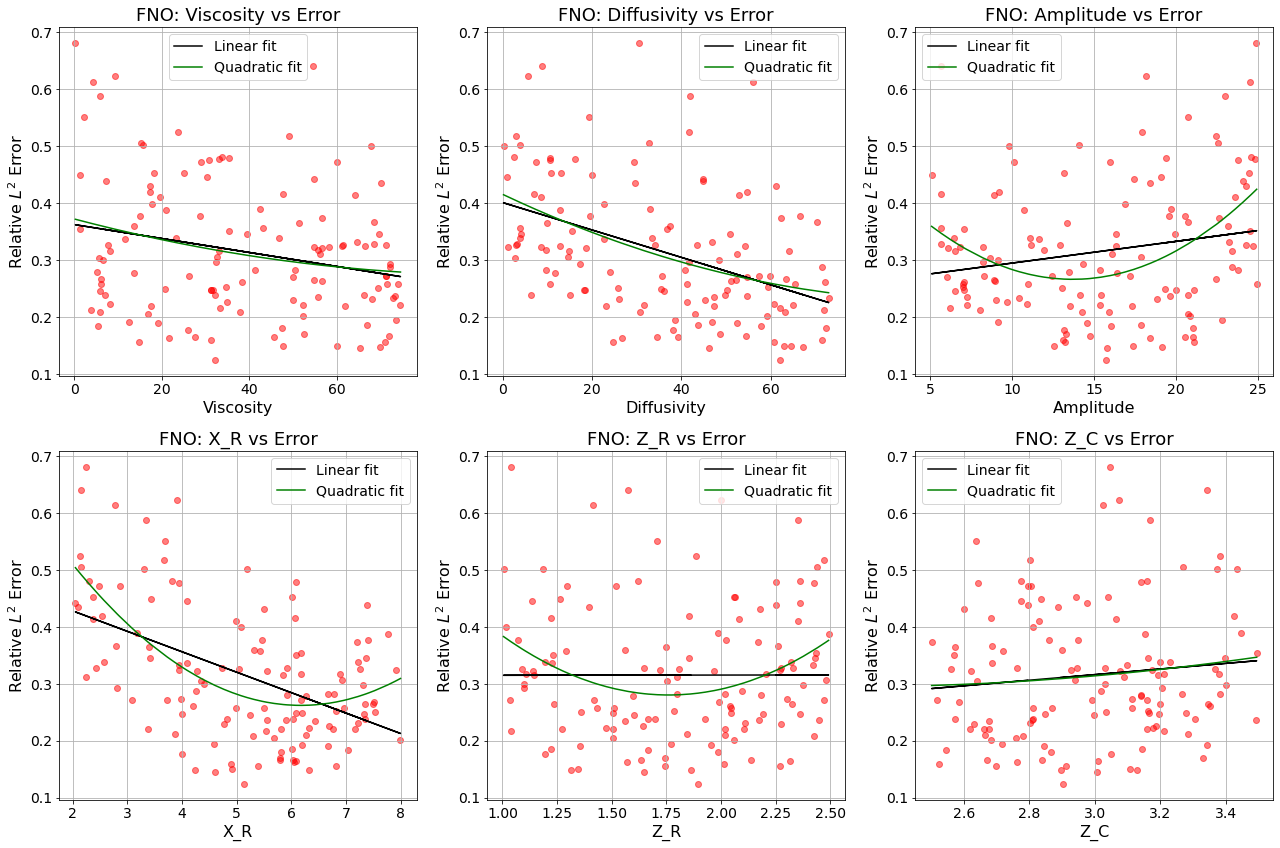

In [8]:
# FNO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

# Load the data from CSV files
fno_data = pd.read_csv('final_fno_data.csv')

# Function to perform Spearman correlation and print results
def print_correlation(attribute, data):
    corr, p_value = permutation_spearmanr(data[attribute], data['Error'])
    print(f"{attribute} vs Error:")
    print("Correlation Coefficient:", corr)
    print("P-value:", p_value)
    print()

# Perform correlation analysis for each attribute
attributes = ['Viscosity', 'Diffusivity', 'Amplitude', 'X_R', 'Z_R', 'Z_C']
for attribute in attributes:
    print_correlation(attribute, fno_data)

# Create scatter plots
plt.figure(figsize=(18, 12))

for i, attribute in enumerate(attributes):
    plt.subplot(2, 3, i + 1)
    plt.scatter(fno_data[attribute], fno_data['Error'], color='red', alpha=0.5)
    
    # Linear fit
    linear_coef = np.polyfit(fno_data[attribute], fno_data['Error'], 1)
    linear_poly = np.poly1d(linear_coef)
    plt.plot(fno_data[attribute], linear_poly(fno_data[attribute]), "black", label='Linear fit')

    # Quadratic fit
    quadratic_coef = np.polyfit(fno_data[attribute], fno_data['Error'], 2)
    quadratic_poly = np.poly1d(quadratic_coef)
    x_sorted = np.sort(fno_data[attribute])
    plt.plot(x_sorted, quadratic_poly(x_sorted), "green", label='Quadratic fit')
    
    plt.title(f'FNO: {attribute} vs Error', fontsize=18)
    plt.xlabel(attribute, fontsize=16)
    plt.ylabel('Relative $L^2$ Error', fontsize=16)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()



C:\Users\james\anaconda3\lib\site-packages\scipy\stats\_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Viscosity vs Error:
Correlation Coefficient: -0.24670962277971067
P-value: 0.0044399556004439955

Diffusivity vs Error:
Correlation Coefficient: -0.40744598058963555
P-value: 1.999980000199998e-05

Amplitude vs Error:
Correlation Coefficient: 0.5403085515473357
P-value: 1.999980000199998e-05

X_R vs Error:
Correlation Coefficient: -0.3900899560520051
P-value: 1.999980000199998e-05

Z_R vs Error:
Correlation Coefficient: 0.061693142281633404
P-value: 0.48571514284857153

Z_C vs Error:
Correlation Coefficient: 0.0776643471891595
P-value: 0.38269617303826964



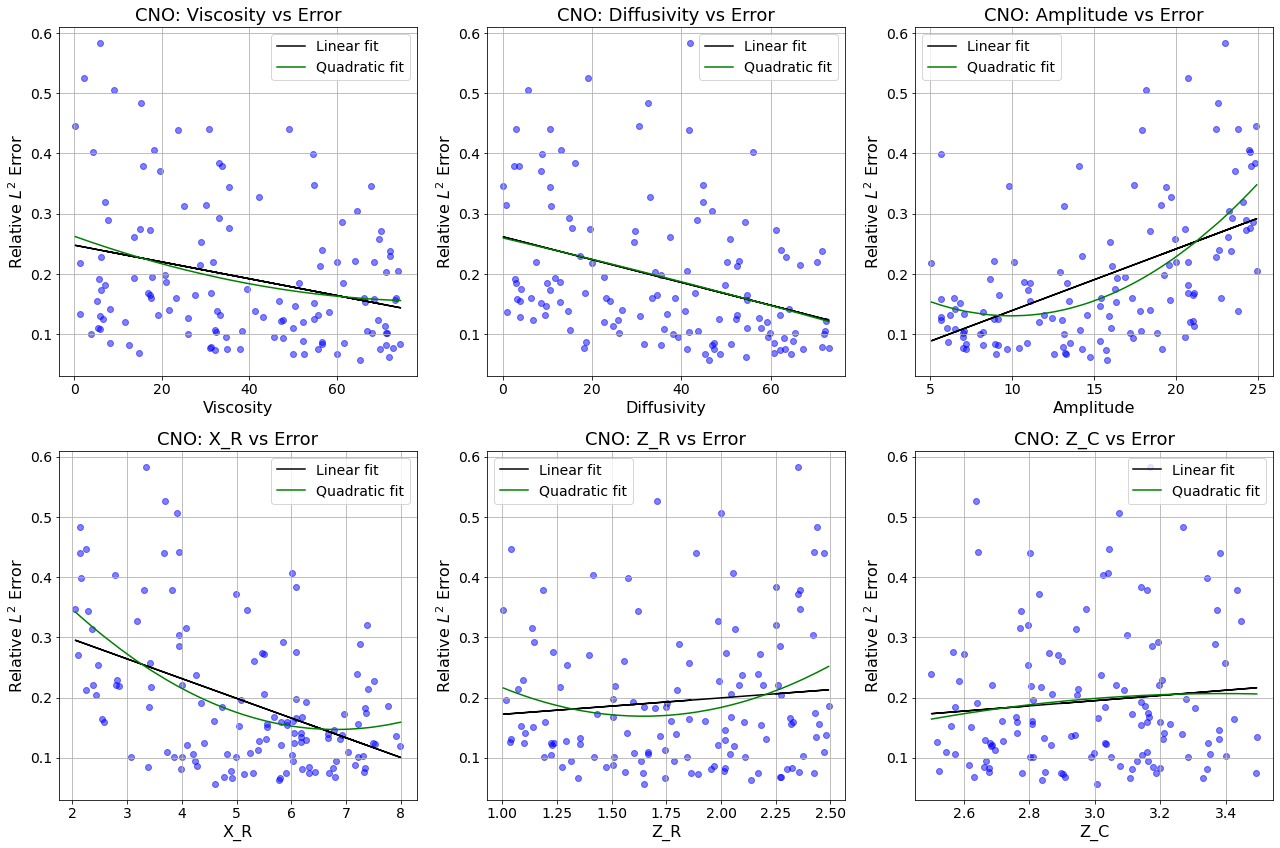

In [7]:
# CNO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the data from CSV files
cno_data = pd.read_csv('final_cno_data.csv')

# Function to perform Spearman correlation and print results
def print_correlation(attribute, data):
    corr, p_value = permutation_spearmanr(data[attribute], data['Error'])
    print(f"{attribute} vs Error:")
    print("Correlation Coefficient:", corr)
    print("P-value:", p_value)
    print()

# Perform correlation analysis for each attribute
attributes = ['Viscosity', 'Diffusivity', 'Amplitude', 'X_R', 'Z_R', 'Z_C']
for attribute in attributes:
    print_correlation(attribute, cno_data)

# Create scatter plots
plt.figure(figsize=(18, 12))

for i, attribute in enumerate(attributes):
    plt.subplot(2, 3, i + 1)
    plt.scatter(cno_data[attribute], cno_data['Error'], color='blue', alpha=0.5)
    
    # Linear fit
    linear_coef = np.polyfit(cno_data[attribute], cno_data['Error'], 1)
    linear_poly = np.poly1d(linear_coef)
    plt.plot(cno_data[attribute], linear_poly(cno_data[attribute]), "black", label='Linear fit')

    # Quadratic fit
    quadratic_coef = np.polyfit(cno_data[attribute], cno_data['Error'], 2)
    quadratic_poly = np.poly1d(quadratic_coef)
    x_sorted = np.sort(cno_data[attribute])
    plt.plot(x_sorted, quadratic_poly(x_sorted), "green", label='Quadratic fit')
    
    plt.title(f'CNO: {attribute} vs Error', fontsize=18)
    plt.xlabel(attribute, fontsize=16)
    plt.ylabel('Relative $L^2$ Error', fontsize=16)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


Linear Coefficients: [0.00381221 0.25682424]
Quadratic Coefficients: [ 0.00125514 -0.0343424   0.50125153]
R-squared for Linear Model: 0.037340453360439674
R-squared for Quadratic Model: 0.14715885883357682
F-statistic: 16.095964443468844
p-value: 0.00010299559120506667
Shapiro-Wilk test p-value: 0.00014814792666584253


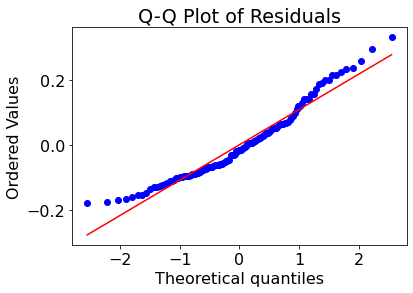

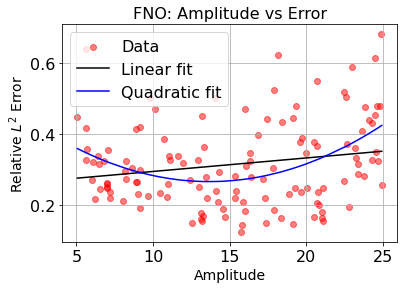

p-value for the quadratic term: 0.8972105616738212


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from CSV files (assuming fno_data is already loaded)
# fno_data = pd.read_csv('final_fno_data.csv')

# Extracting the data
x = fno_data['Amplitude']
y = fno_data['Error']

# Fit a linear model
linear_coeffs = np.polyfit(x, y, 1)
linear_model = np.poly1d(linear_coeffs)

# Fit a quadratic polynomial
quadratic_coeffs = np.polyfit(x, y, 2)
quadratic_model = np.poly1d(quadratic_coeffs)

# Predict y values using both models
y_pred_linear = linear_model(x)
y_pred_quadratic = quadratic_model(x)

# Calculate residuals for both models
residuals_linear = y - y_pred_linear
residuals_quadratic = y - y_pred_quadratic

# Sum of squared residuals for both models
ss_res_linear = np.sum(residuals_linear**2)
ss_res_quadratic = np.sum(residuals_quadratic**2)

# Total sum of squares
ss_tot = np.sum((y - np.mean(y))**2)

# Degrees of freedom
n = len(y)  # Number of observations
p_linear = 1  # Number of predictors in the linear model
p_quadratic = 2  # Number of predictors in the quadratic model

df_model_linear = p_linear
df_model_quadratic = p_quadratic - p_linear  # Additional degrees of freedom for the quadratic model
df_residual = n - (p_quadratic + 1)  # Adjusted for the quadratic model

# Mean squares
ms_model = (ss_res_linear - ss_res_quadratic) / df_model_quadratic
ms_residual = ss_res_quadratic / df_residual

# F-statistic
f_statistic = ms_model / ms_residual

# p-value
p_value = stats.f.sf(f_statistic, df_model_quadratic, df_residual)

# Print the results
print(f"Linear Coefficients: {linear_coeffs}")
print(f"Quadratic Coefficients: {quadratic_coeffs}")
print(f"R-squared for Linear Model: {1 - (ss_res_linear / ss_tot)}")
print(f"R-squared for Quadratic Model: {1 - (ss_res_quadratic / ss_tot)}")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Check normality of residuals for the quadratic model
shapiro_test = stats.shapiro(residuals_quadratic)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")

# Q-Q plot of residuals for the quadratic model
plt.figure()
stats.probplot(residuals_quadratic, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot the data and the fits
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
x_sorted = np.sort(x)
plt.plot(x_sorted, linear_model(x_sorted), color='black', label='Linear fit')
plt.plot(x_sorted, quadratic_model(x_sorted), color='blue', label='Quadratic fit')
plt.title('FNO: Amplitude vs Error', fontsize=16)
plt.xlabel('Amplitude', fontsize=14)
plt.ylabel('Relative $L^2$ Error', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Compute p-value for the quadratic term specifically using t-test
X = np.vstack([np.ones_like(x), x, x**2]).T
beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
y_pred = X @ beta
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
p_value_quadratic = stats.t.sf(np.abs(beta[2] / (np.std(residuals_quadratic) / np.sqrt(n))), df_residual) * 2

print(f"p-value for the quadratic term: {p_value_quadratic}")


Intercept-Only Model Mean: 0.3153838439611718
Linear Coefficients: [0.00381221 0.25682424]
R-squared for Mean Model: 0
R-squared for Linear Model: 0.037340453360439674
F-statistic: 4.887394655607162
p-value: 0.02885809301736479
Shapiro-Wilk test p-value: 0.0019869140814989805


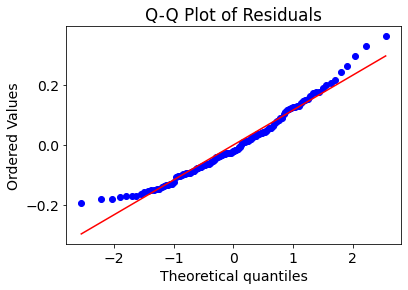

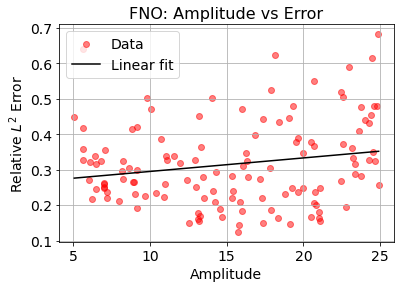

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from CSV files (assuming fno_data is already loaded)
# fno_data = pd.read_csv('final_fno_data.csv')

# Extracting the data
x = fno_data['Amplitude']
y = fno_data['Error']

# Fit an intercept-only model (mean model)
mean_model = np.mean(y)
y_pred_mean = np.full_like(y, mean_model)

# Fit a linear model
linear_coeffs = np.polyfit(x, y, 1)
linear_model = np.poly1d(linear_coeffs)
y_pred_linear = linear_model(x)

# Calculate residuals for both models
residuals_mean = y - y_pred_mean
residuals_linear = y - y_pred_linear

# Sum of squared residuals for both models
ss_res_mean = np.sum(residuals_mean**2)
ss_res_linear = np.sum(residuals_linear**2)

# Degrees of freedom
n = len(y)  # Number of observations
df_model_mean = 0  # Number of predictors in the mean model
df_model_linear = 1  # Number of predictors in the linear model
df_residual_mean = n - 1  # Degrees of freedom for residuals in mean model
df_residual_linear = n - 2  # Degrees of freedom for residuals in linear model

# Mean squares
ms_model = (ss_res_mean - ss_res_linear) / (df_model_linear - df_model_mean)
ms_residual = ss_res_linear / df_residual_linear

# F-statistic
f_statistic = ms_model / ms_residual

# p-value
p_value = stats.f.sf(f_statistic, df_model_linear - df_model_mean, df_residual_linear)

# Print the results
print(f"Intercept-Only Model Mean: {mean_model}")
print(f"Linear Coefficients: {linear_coeffs}")
print(f"R-squared for Mean Model: 0")
print(f"R-squared for Linear Model: {1 - (ss_res_linear / ss_res_mean)}")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Check normality of residuals for the linear model
shapiro_test = stats.shapiro(residuals_linear)
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue}")

# Q-Q plot of residuals for the linear model
plt.figure()
stats.probplot(residuals_linear, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot the data and the linear fit
plt.scatter(x, y, color='red', alpha=0.5, label='Data')
x_sorted = np.sort(x)
plt.plot(x_sorted, linear_model(x_sorted), color='black', label='Linear fit')
plt.title('FNO: Amplitude vs Error', fontsize=16)
plt.xlabel('Amplitude', fontsize=14)
plt.ylabel('Relative $L^2$ Error', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


## Viscosity and Diffusivity vs. Error

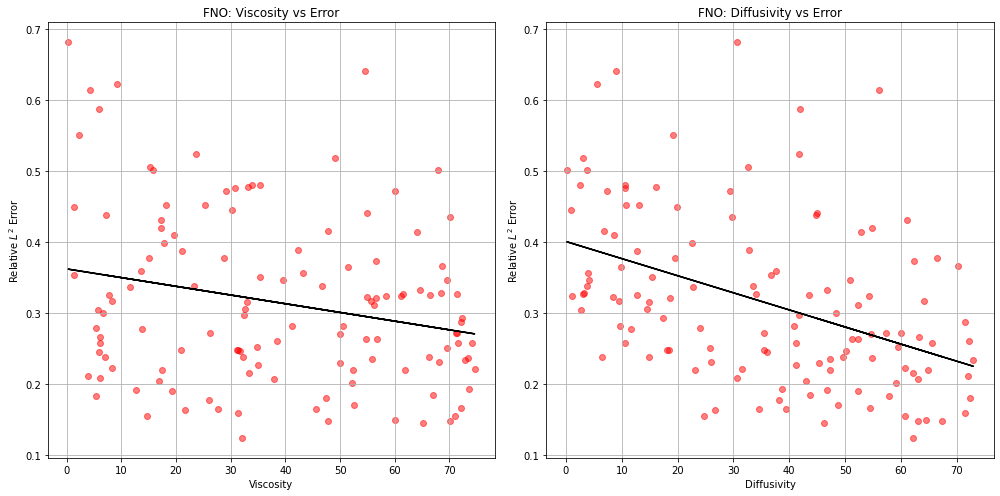

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV files
cno_data = pd.read_csv('final_cno_data.csv')
fno_data = pd.read_csv('final_fno_data.csv')

# Create scatter plots
plt.figure(figsize=(14, 7))

# FNO
plt.subplot(1, 2, 1)
plt.scatter(fno_data['Viscosity'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Viscosity'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Viscosity'], poly(fno_data['Viscosity']), "black")
plt.title('FNO: Viscosity vs Error')
plt.xlabel('Viscosity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(fno_data['Diffusivity'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Diffusivity'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Diffusivity'], poly(fno_data['Diffusivity']), "black")
plt.title('FNO: Diffusivity vs Error')
plt.xlabel('Diffusivity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import spearmanr

viscosity_corr, viscosity_p_value = permutation_spearmanr(fno_data['Viscosity'], fno_data['Error'])

diffusivity_corr, diffusivity_p_value = permutation_spearmanr(fno_data['Diffusivity'], fno_data['Error'])

# Print out the results
print("Viscosity vs Error:")
print("Correlation Coefficient:", viscosity_corr)
print("P-value:", viscosity_p_value)


print("\nDiffusivity vs Error:")
print("Correlation Coefficient:", diffusivity_corr)
print("P-value:", diffusivity_p_value)

C:\Users\james\anaconda3\lib\site-packages\scipy\stats\_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


Viscosity vs Error:
Correlation Coefficient: -0.19402925288408715
P-value: 0.030396960303969604

Diffusivity vs Error:
Correlation Coefficient: -0.47613761215894523
P-value: 0.00019998000199980003


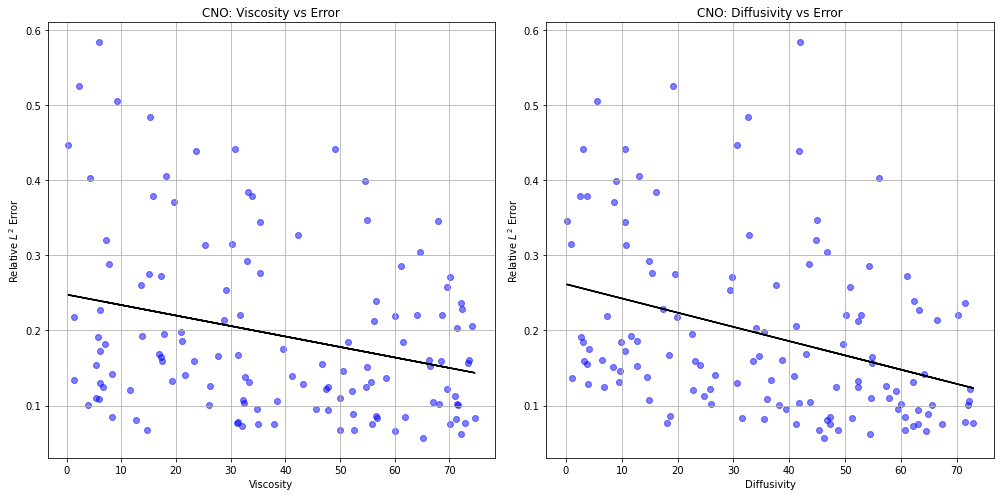

In [38]:
plt.figure(figsize=(14, 7))

# CNO
plt.subplot(1, 2, 1)
plt.scatter(cno_data['Viscosity'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['Viscosity'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['Viscosity'], poly(cno_data['Viscosity']), "black")
plt.title('CNO: Viscosity vs Error')
plt.xlabel('Viscosity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(cno_data['Diffusivity'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Diffusivity'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Diffusivity'], diff_poly(cno_data['Diffusivity']), "black")
plt.title('CNO: Diffusivity vs Error')
plt.xlabel('Diffusivity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [39]:
# Calculate Spearman correlation for viscosity vs error
viscosity_corr, viscosity_p_value = permutation_spearmanr(cno_data['Viscosity'], cno_data['Error'])

# Calculate Spearman correlation for diffusivity vs error
diffusivity_corr, diffusivity_p_value = permutation_spearmanr(cno_data['Diffusivity'], cno_data['Error'])

# Print out the results
print("Viscosity vs Error:")
print("Correlation Coefficient:", viscosity_corr)
print("P-value:", viscosity_p_value)

print("\nDiffusivity vs Error:")
print("Correlation Coefficient:", diffusivity_corr)
print("P-value:", diffusivity_p_value)

Viscosity vs Error:
Correlation Coefficient: -0.24670962277971067
P-value: 0.0053994600539946005

Diffusivity vs Error:
Correlation Coefficient: -0.40744598058963555
P-value: 0.00019998000199980003


## Amplitude vs. Error

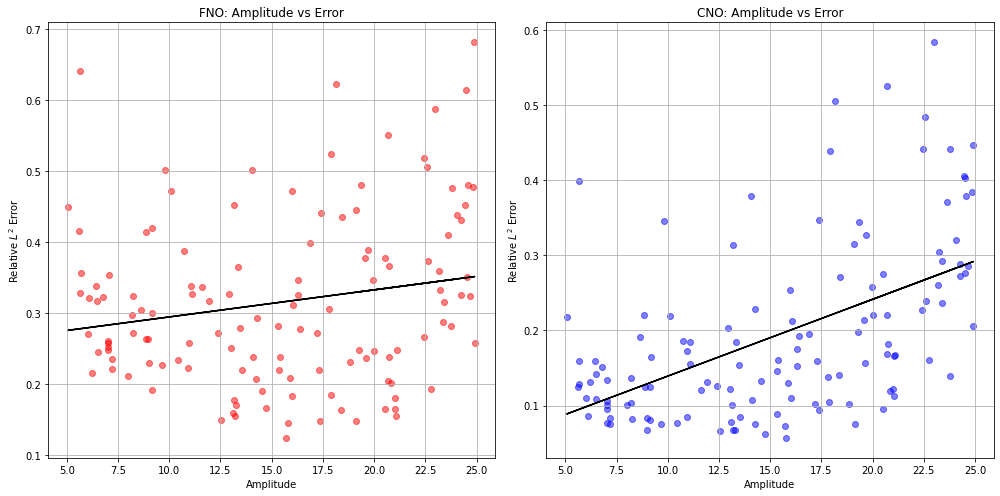

In [40]:
# Create scatter plots
plt.figure(figsize=(14, 7))

# FNO
plt.subplot(1, 2, 1)
plt.scatter(fno_data['Amplitude'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Amplitude'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Amplitude'], poly(fno_data['Amplitude']), "black")
plt.title('FNO: Amplitude vs Error')
plt.xlabel('Amplitude')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(cno_data['Amplitude'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Amplitude'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Amplitude'], diff_poly(cno_data['Amplitude']), "black")
plt.title('CNO: Amplitude vs Error')
plt.xlabel('Amplitude')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
fno_amplitude_corr, fno_amplitudey_p_value = permutation_spearmanr(fno_data['Amplitude'], fno_data['Error'])

cno_amplitude_corr, cno_amplitudey_p_value = permutation_spearmanr(cno_data['Amplitude'], cno_data['Error'])

# Print out the results
print("FNO: Amplitude vs Error:")
print("Correlation Coefficient:", fno_amplitude_corr)
print("P-value:", fno_amplitudey_p_value)

print("CNO: Amplitude vs Error:")
print("Correlation Coefficient:", cno_amplitude_corr)
print("P-value:", cno_amplitudey_p_value)

FNO: Amplitude vs Error:
Correlation Coefficient: 0.1603129005676616
P-value: 0.07799220077992201
CNO: Amplitude vs Error:
Correlation Coefficient: 0.5403085515473357
P-value: 0.00019998000199980003


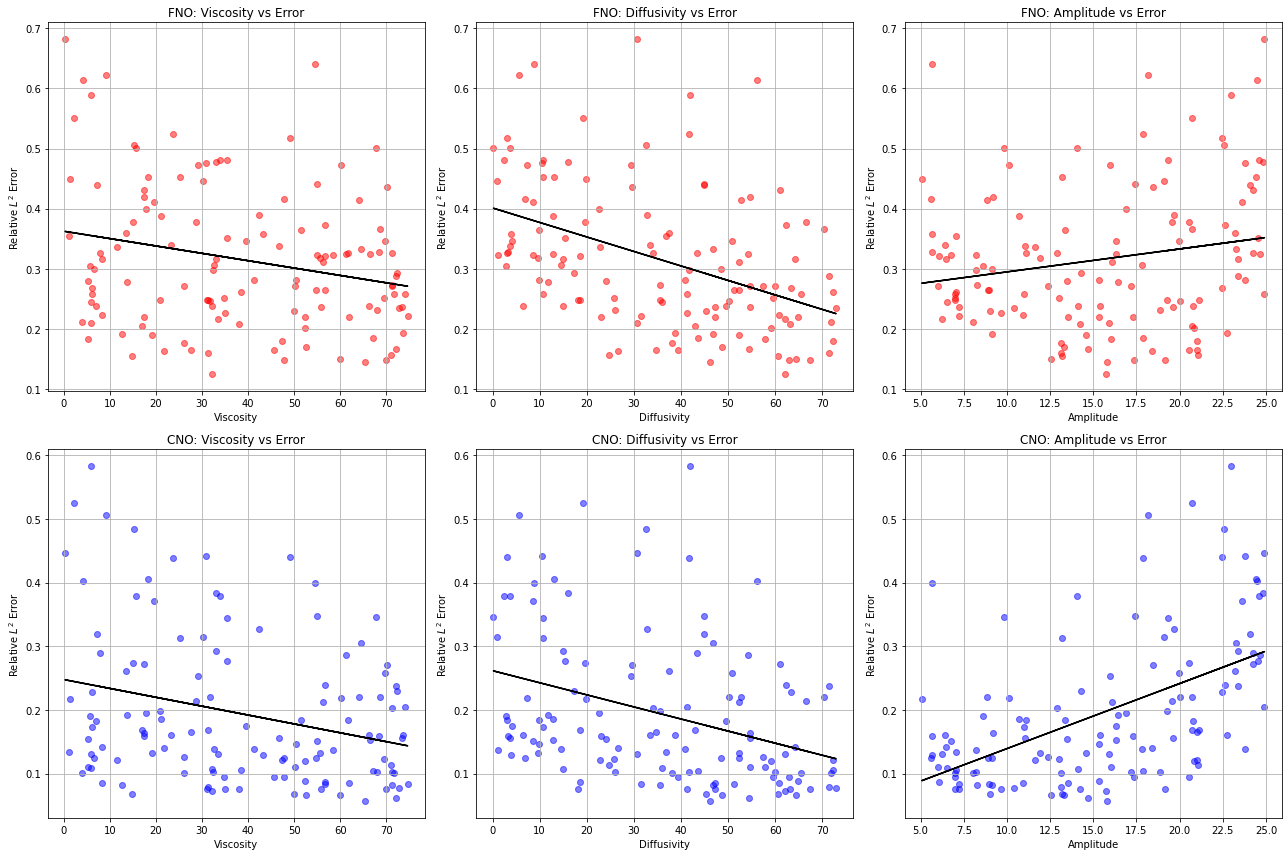

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV files
cno_data = pd.read_csv('final_cno_data.csv')
fno_data = pd.read_csv('final_fno_data.csv')

# Create scatter plots
plt.figure(figsize=(18, 12))

# FNO: Viscosity vs Error
plt.subplot(2, 3, 1)
plt.scatter(fno_data['Viscosity'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Viscosity'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Viscosity'], poly(fno_data['Viscosity']), "black")
plt.title('FNO: Viscosity vs Error')
plt.xlabel('Viscosity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Diffusivity vs Error
plt.subplot(2, 3, 2)
plt.scatter(fno_data['Diffusivity'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Diffusivity'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Diffusivity'], poly(fno_data['Diffusivity']), "black")
plt.title('FNO: Diffusivity vs Error')
plt.xlabel('Diffusivity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Amplitude vs Error
plt.subplot(2, 3, 3)
plt.scatter(fno_data['Amplitude'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Amplitude'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Amplitude'], poly(fno_data['Amplitude']), "black")
plt.title('FNO: Amplitude vs Error')
plt.xlabel('Amplitude')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: Viscosity vs Error
plt.subplot(2, 3, 4)
plt.scatter(cno_data['Viscosity'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['Viscosity'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['Viscosity'], poly(cno_data['Viscosity']), "black")
plt.title('CNO: Viscosity vs Error')
plt.xlabel('Viscosity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: Diffusivity vs Error
plt.subplot(2, 3, 5)
plt.scatter(cno_data['Diffusivity'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Diffusivity'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Diffusivity'], diff_poly(cno_data['Diffusivity']), "black")
plt.title('CNO: Diffusivity vs Error')
plt.xlabel('Diffusivity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: Amplitude vs Error
plt.subplot(2, 3, 6)
plt.scatter(cno_data['Amplitude'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Amplitude'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Amplitude'], diff_poly(cno_data['Amplitude']), "black")
plt.title('CNO: Amplitude vs Error')
plt.xlabel('Amplitude')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()


Interesting: Seems to have same correlation. Try other models!

## Initial Position vs. Error

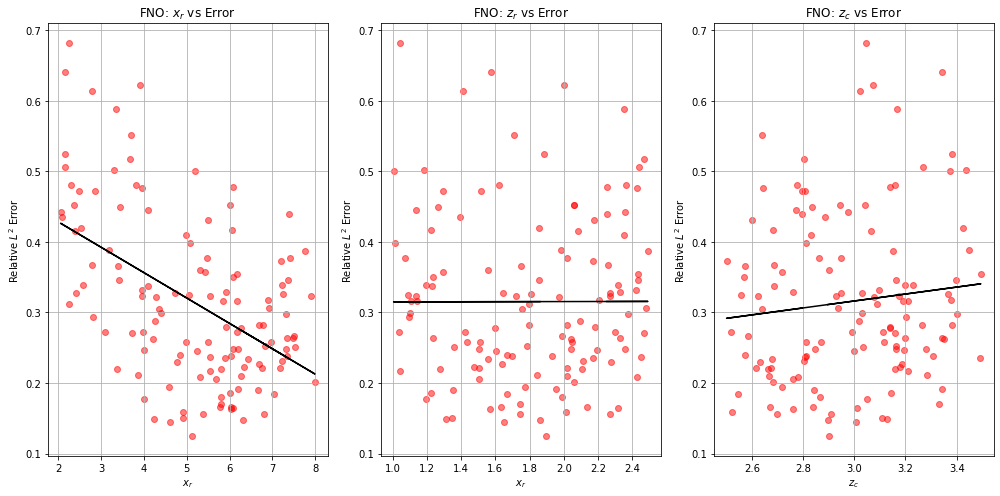

In [43]:
# Create scatter plots
plt.figure(figsize=(14, 7))

# FNO
plt.subplot(1, 3, 1)
plt.scatter(fno_data['X_R'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['X_R'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['X_R'], poly(fno_data['X_R']), "black")
plt.title('FNO: $x_r$ vs Error')
plt.xlabel('$x_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(fno_data['Z_R'], fno_data['Error'], color='red', alpha=0.5)
diff_coef = np.polyfit(fno_data['Z_R'], fno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(fno_data['Z_R'], diff_poly(fno_data['Z_R']), "black")
plt.title('FNO: $z_r$ vs Error')
plt.xlabel('$x_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(fno_data['Z_C'], fno_data['Error'], color='red', alpha=0.5)
diff_coef = np.polyfit(fno_data['Z_C'], fno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(fno_data['Z_C'], diff_poly(fno_data['Z_C']), "black")
plt.title('FNO: $z_c$ vs Error')
plt.xlabel('$z_c$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()

In [44]:
xr_corr, xr_p_value = permutation_spearmanr(fno_data['X_R'], fno_data['Error'])

zr_corr, zr_p_value = permutation_spearmanr(fno_data['Z_R'], fno_data['Error'])

zc_corr, zc_p_value = permutation_spearmanr(fno_data['Z_C'], fno_data['Error'])


# Print out the results
print("X_R vs Error:")
print("Correlation Coefficient:", xr_corr)
print("P-value:", xr_p_value)

print("Z_R vs Error:")
print("Correlation Coefficient:", zr_corr)
print("P-value:", zr_p_value)

print("Z_C vs Error:")
print("Correlation Coefficient:", zc_corr)
print("P-value:", zc_p_value)

C:\Users\james\anaconda3\lib\site-packages\scipy\stats\_resampling.py:840: RuntimeWarning: overflow encountered in double_scalars
  n_max = factorial(n_obs_sample)**n_samples


X_R vs Error:
Correlation Coefficient: -0.4166876487822743
P-value: 0.00019998000199980003
Z_R vs Error:
Correlation Coefficient: 0.048640358908624795
P-value: 0.5793420657934206
Z_C vs Error:
Correlation Coefficient: 0.1047141091375206
P-value: 0.24797520247975202


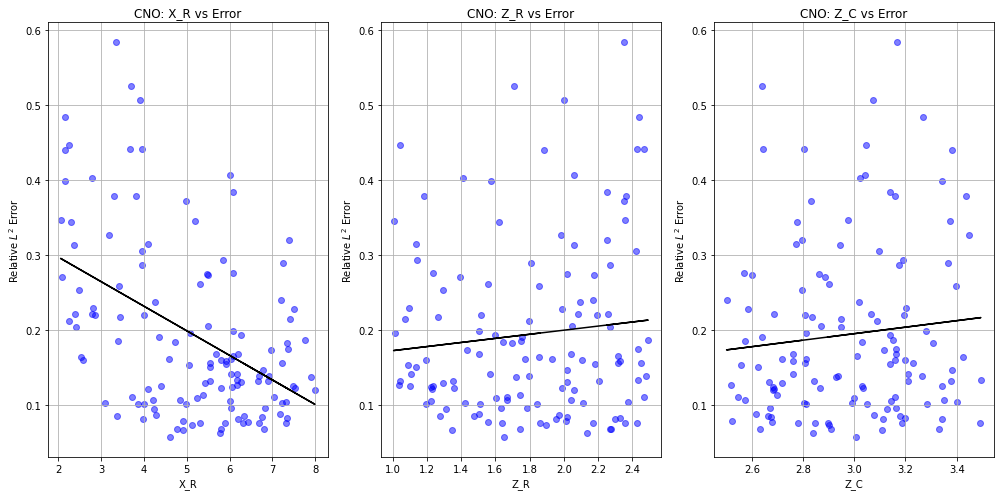

In [45]:
# Create scatter plots
plt.figure(figsize=(14, 7))

# CNO
plt.subplot(1, 3, 1)
plt.scatter(cno_data['X_R'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['X_R'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['X_R'], poly(cno_data['X_R']), "black")
plt.title('CNO: X_R vs Error')
plt.xlabel('X_R')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(cno_data['Z_R'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Z_R'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Z_R'], diff_poly(cno_data['Z_R']), "black")
plt.title('CNO: Z_R vs Error')
plt.xlabel('Z_R')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(cno_data['Z_C'], cno_data['Error'], color='blue', alpha=0.5)
diff_coef = np.polyfit(cno_data['Z_C'], cno_data['Error'], 1)
diff_poly = np.poly1d(diff_coef)
plt.plot(cno_data['Z_C'], diff_poly(cno_data['Z_C']), "black")
plt.title('CNO: Z_C vs Error')
plt.xlabel('Z_C')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
xr_corr, xr_p_value = permutation_spearmanr(cno_data['X_R'], cno_data['Error'])

zr_corr, zr_p_value = permutation_spearmanr(cno_data['Z_R'], cno_data['Error'])

zc_corr, zc_p_value = permutation_spearmanr(cno_data['Z_C'], cno_data['Error'])


# Print out the results
print("X_R vs Error:")
print("Correlation Coefficient:", xr_corr)
print("P-value:", xr_p_value)

print("Z_R vs Error:")
print("Correlation Coefficient:", zr_corr)
print("P-value:", zr_p_value)

print("Z_C vs Error:")
print("Correlation Coefficient:", zc_corr)
print("P-value:", zc_p_value)

X_R vs Error:
Correlation Coefficient: -0.3900899560520051
P-value: 0.00019998000199980003
Z_R vs Error:
Correlation Coefficient: 0.061693142281633404
P-value: 0.48435156484351566
Z_C vs Error:
Correlation Coefficient: 0.0776643471891595
P-value: 0.388961103889611


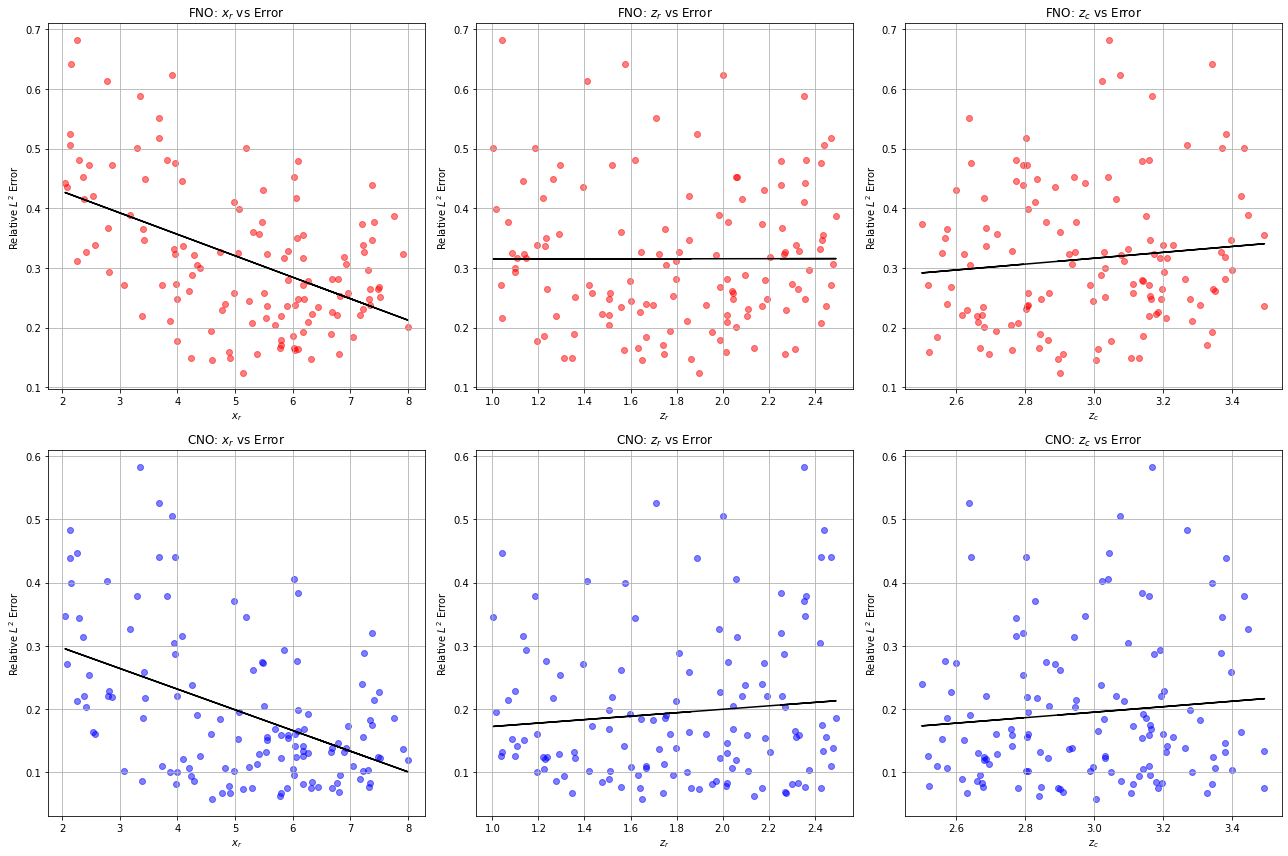

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV files
cno_data = pd.read_csv('final_cno_data.csv')
fno_data = pd.read_csv('final_fno_data.csv')

# Create scatter plots
plt.figure(figsize=(18, 12))

# FNO: X_R vs Error
plt.subplot(2, 3, 1)
plt.scatter(fno_data['X_R'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['X_R'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['X_R'], poly(fno_data['X_R']), "black")
plt.title('FNO: $x_r$ vs Error')
plt.xlabel('$x_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Z_R vs Error
plt.subplot(2, 3, 2)
plt.scatter(fno_data['Z_R'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Z_R'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Z_R'], poly(fno_data['Z_R']), "black")
plt.title('FNO: $z_r$ vs Error')
plt.xlabel('$z_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Z_C vs Error
plt.subplot(2, 3, 3)
plt.scatter(fno_data['Z_C'], fno_data['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data['Z_C'], fno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data['Z_C'], poly(fno_data['Z_C']), "black")
plt.title('FNO: $z_c$ vs Error')
plt.xlabel('$z_c$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: X_R vs Error
plt.subplot(2, 3, 4)
plt.scatter(cno_data['X_R'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['X_R'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['X_R'], poly(cno_data['X_R']), "black")
plt.title('CNO: $x_r$ vs Error')
plt.xlabel('$x_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: Z_R vs Error
plt.subplot(2, 3, 5)
plt.scatter(cno_data['Z_R'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['Z_R'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['Z_R'], poly(cno_data['Z_R']), "black")
plt.title('CNO: $z_r$ vs Error')
plt.xlabel('$z_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# CNO: Z_C vs Error
plt.subplot(2, 3, 6)
plt.scatter(cno_data['Z_C'], cno_data['Error'], color='blue', alpha=0.5)
coef = np.polyfit(cno_data['Z_C'], cno_data['Error'], 1)
poly = np.poly1d(coef)
plt.plot(cno_data['Z_C'], poly(cno_data['Z_C']), "black")
plt.title('CNO: $z_c$ vs Error')
plt.xlabel('$z_c$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()


## FNO Autoregress

In [17]:
fno_data_dt_60 = pd.read_csv('fno_data_dt_60.csv')
fno_data_dt_60

,Unnamed: 0.1,Unnamed: 0,Index,Viscosity,Diffusivity,Amplitude,X_R,Z_R,Z_C,Error
0,0,0,0,70.022096,67.318567,19.127638,6.320960,1.860776,2.896131,0.212773
1,1,1,1,7.050637,49.681818,20.743752,7.340798,1.698562,3.306840,0.336458
2,2,2,2,4.294962,56.075487,24.485684,2.775479,1.412670,3.023765,0.559248
3,3,3,3,52.634759,48.745033,13.281851,5.792392,1.742282,3.329307,0.154248
4,4,4,4,47.795742,6.885796,5.620475,6.055686,1.221408,2.681188,0.741883
...,...,...,...,...,...,...,...,...,...,...
123,123,123,123,64.597663,46.812056,23.235606,3.948880,2.422107,3.097734,0.354848
124,124,124,124,42.388690,32.886380,19.680374,3.171576,1.985812,3.447222,0.671950
125,125,125,125,51.528093,9.890443,13.345686,3.404177,1.749030,2.573855,0.342691
126,126,126,126,71.613137,65.524912,7.010941,4.985821,1.511593,2.809687,0.504319


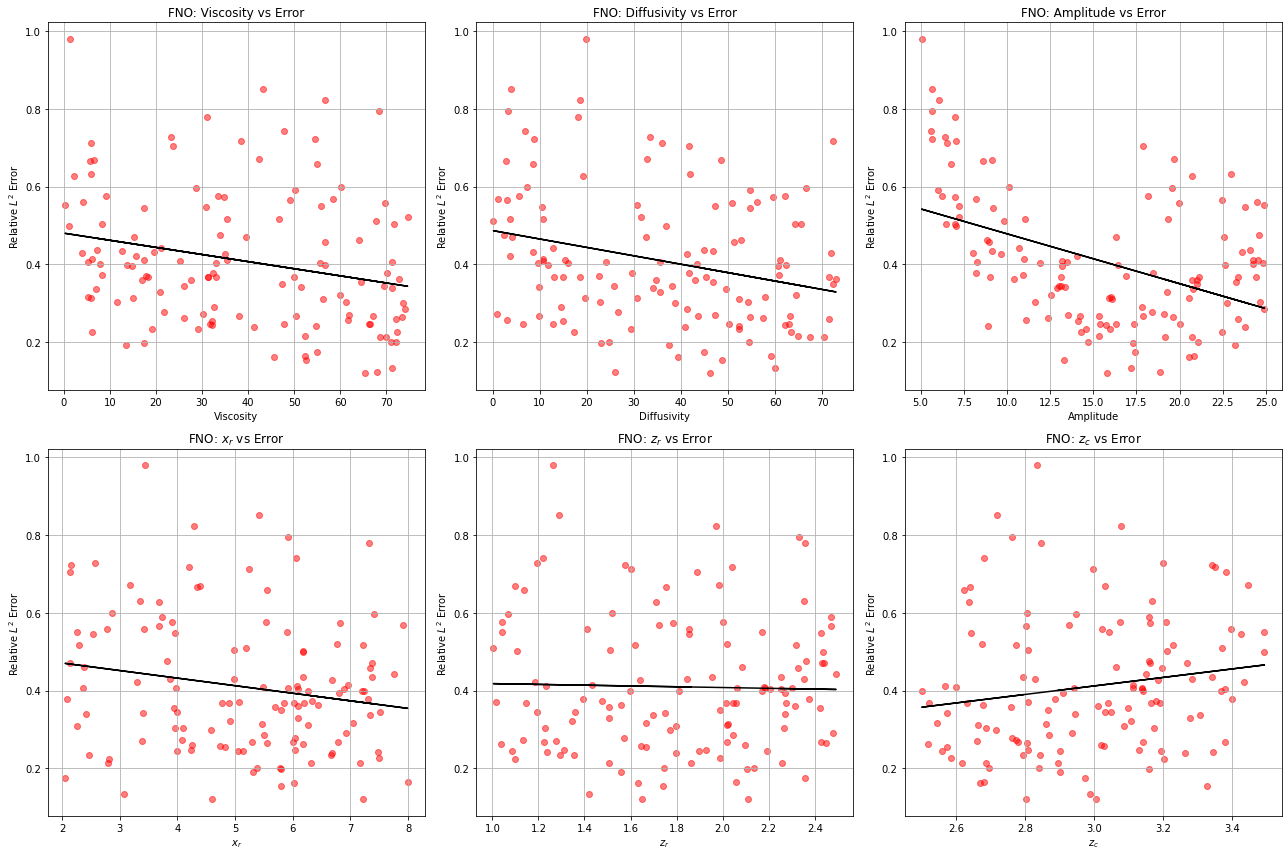

In [18]:
# Create scatter plots
plt.figure(figsize=(18, 12))

# FNO: Viscosity vs Error
plt.subplot(2, 3, 1)
plt.scatter(fno_data_dt_60['Viscosity'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['Viscosity'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['Viscosity'], poly(fno_data_dt_60['Viscosity']), "black")
plt.title('FNO: Viscosity vs Error')
plt.xlabel('Viscosity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Diffusivity vs Error
plt.subplot(2, 3, 2)
plt.scatter(fno_data_dt_60['Diffusivity'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['Diffusivity'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['Diffusivity'], poly(fno_data_dt_60['Diffusivity']), "black")
plt.title('FNO: Diffusivity vs Error')
plt.xlabel('Diffusivity')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Amplitude vs Error
plt.subplot(2, 3, 3)
plt.scatter(fno_data_dt_60['Amplitude'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['Amplitude'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['Amplitude'], poly(fno_data_dt_60['Amplitude']), "black")
plt.title('FNO: Amplitude vs Error')
plt.xlabel('Amplitude')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: X_R vs Error
plt.subplot(2, 3, 4)
plt.scatter(fno_data_dt_60['X_R'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['X_R'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['X_R'], poly(fno_data_dt_60['X_R']), "black")
plt.title('FNO: $x_r$ vs Error')
plt.xlabel('$x_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Z_R vs Error
plt.subplot(2, 3, 5)
plt.scatter(fno_data_dt_60['Z_R'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['Z_R'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['Z_R'], poly(fno_data_dt_60['Z_R']), "black")
plt.title('FNO: $z_r$ vs Error')
plt.xlabel('$z_r$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

# FNO: Z_C vs Error
plt.subplot(2, 3, 6)
plt.scatter(fno_data_dt_60['Z_C'], fno_data_dt_60['Error'], color='red', alpha=0.5)
coef = np.polyfit(fno_data_dt_60['Z_C'], fno_data_dt_60['Error'], 1)
poly = np.poly1d(coef)
plt.plot(fno_data_dt_60['Z_C'], poly(fno_data_dt_60['Z_C']), "black")
plt.title('FNO: $z_c$ vs Error')
plt.xlabel('$z_c$')
plt.ylabel('Relative $L^2$ Error')
plt.grid(True)

plt.tight_layout()
plt.show()

Viscosity vs Error:
Correlation Coefficient: -0.2760082860282
P-value: 0.0016130514521299926

Diffusivity vs Error:
Correlation Coefficient: -0.26825444057864856
P-value: 0.0022023335464457926

Amplitude vs Error:
Correlation Coefficient: -0.38354925837758647
P-value: 7.861052622745596e-06

X_R vs Error:
Correlation Coefficient: -0.14487960080571324
P-value: 0.10274966864578074

Z_R vs Error:
Correlation Coefficient: 0.029584783006775316
P-value: 0.7402647832208237

Z_C vs Error:
Correlation Coefficient: 0.22065555759018493
P-value: 0.012318962747543925



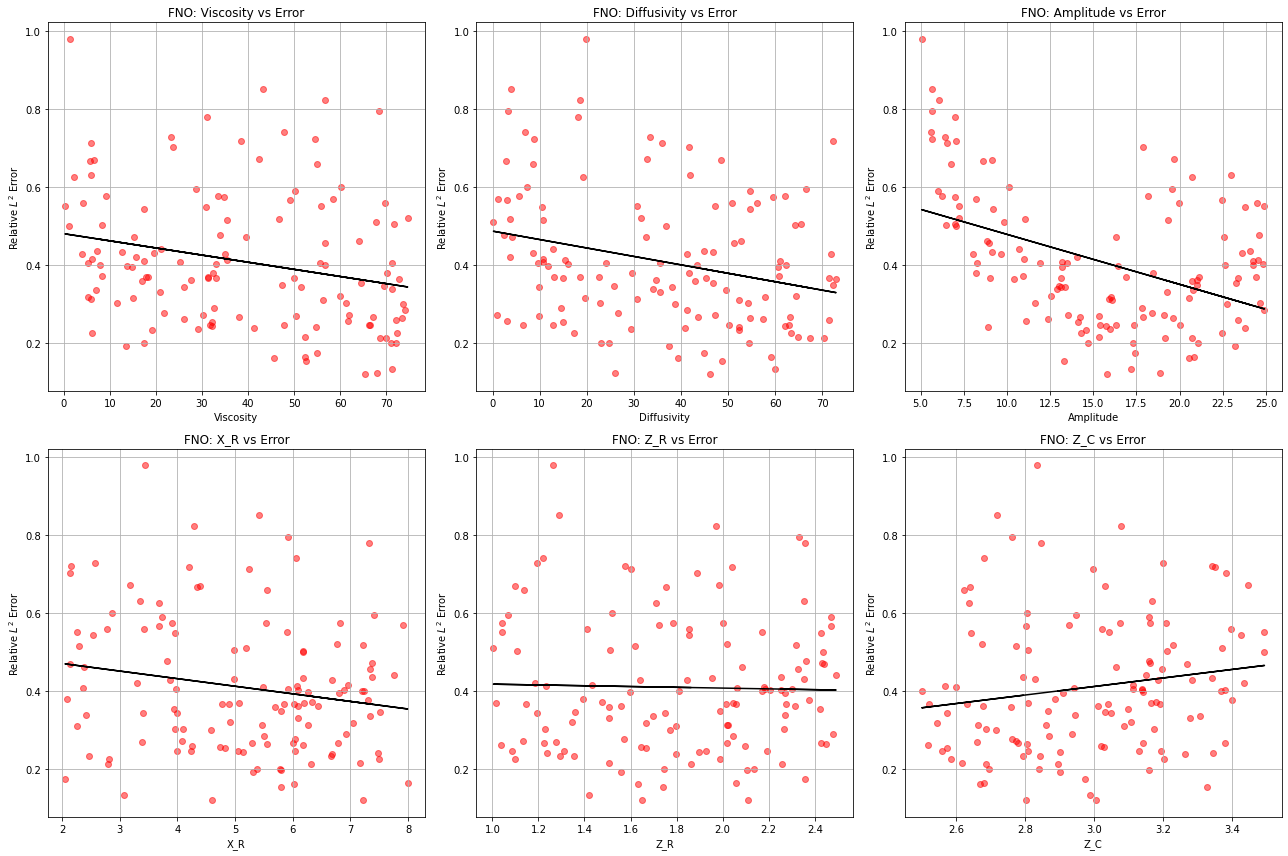

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming fno_data_dt_60 is a DataFrame with the following columns: 'Viscosity', 'Diffusivity', 'Amplitude', 'X_R', 'Z_R', 'Z_C', and 'Error'
# Replace this with your actual data loading code if necessary

# Function to perform Pearson correlation and print results
def print_correlation(attribute, data):
    corr, p_value = spearmanr(data[attribute], data['Error'])
    print(f"{attribute} vs Error:")
    print("Correlation Coefficient:", corr)
    print("P-value:", p_value)
    print()

# Perform correlation analysis for each attribute
attributes = ['Viscosity', 'Diffusivity', 'Amplitude', 'X_R', 'Z_R', 'Z_C']
for attribute in attributes:
    print_correlation(attribute, fno_data_dt_60)

# Create scatter plots
plt.figure(figsize=(18, 12))

for i, attribute in enumerate(attributes):
    plt.subplot(2, 3, i + 1)
    plt.scatter(fno_data_dt_60[attribute], fno_data_dt_60['Error'], color='red', alpha=0.5)
    coef = np.polyfit(fno_data_dt_60[attribute], fno_data_dt_60['Error'], 1)
    poly = np.poly1d(coef)
    plt.plot(fno_data_dt_60[attribute], poly(fno_data_dt_60[attribute]), "black")
    plt.title(f'FNO: {attribute} vs Error')
    plt.xlabel(attribute)
    plt.ylabel('Relative $L^2$ Error')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [48]:
import pandas as pd


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(fno_data)


     Unnamed: 0  Index  Viscosity  Diffusivity  Amplitude       X_R       Z_R  \
0             0      0  70.022096    67.318567  19.127638  6.320960  1.860776   
1             1      1   7.050637    49.681818  20.743752  7.340798  1.698562   
2             2      2   4.294962    56.075487  24.485684  2.775479  1.412670   
3             3      3  52.634759    48.745033  13.281851  5.792392  1.742282   
4             4      4  47.795742     6.885796   5.620475  6.055686  1.221408   
5             5      5  26.157812    57.384255  12.402212  6.180835  1.035632   
6             6      6  61.197950    54.350372  24.661133  3.954074  2.268486   
7             7      7  25.218173    10.774005  13.170587  2.365467  2.062136   
8             8      8  56.658990    62.254254  22.619349  7.200233  2.170421   
9             9      9  23.711271    41.717624  17.897136  2.145341  1.886984   
10           10     10   8.296544    60.799881  10.915077  6.327639  1.475111   
11           11     11  33.3

In [49]:
cno_data.iloc[53]


Unnamed: 0     53.000000
Index          53.000000
Viscosity       0.284002
Diffusivity    30.607630
Amplitude      24.881440
X_R             2.254162
Z_R             1.040919
Z_C             3.044722
Error           0.446334
Name: 53, dtype: float64

Only X_R statistically relevant. This correlation makes sense, as initial data on the very right gets smushed into border

In [47]:
fno_data

,Unnamed: 0,Index,Viscosity,Diffusivity,Amplitude,X_R,Z_R,Z_C,Error
0,0,0,70.022096,67.318567,19.127638,6.320960,1.860776,2.896131,0.148241
1,1,1,7.050637,49.681818,20.743752,7.340798,1.698562,3.306840,0.238265
2,2,2,4.294962,56.075487,24.485684,2.775479,1.412670,3.023765,0.613831
3,3,3,52.634759,48.745033,13.281851,5.792392,1.742282,3.329307,0.170575
4,4,4,47.795742,6.885796,5.620475,6.055686,1.221408,2.681188,0.416528
...,...,...,...,...,...,...,...,...,...
123,123,123,64.597663,46.812056,23.235606,3.948880,2.422107,3.097734,0.332422
124,124,124,42.388690,32.886380,19.680374,3.171576,1.985812,3.447222,0.389214
125,125,125,51.528093,9.890443,13.345686,3.404177,1.749030,2.573855,0.365203
126,126,126,71.613137,65.524912,7.010941,4.985821,1.511593,2.809687,0.258202


In [77]:
validation_df = pd.read_csv('validation_tracking_CNO.csv')

In [80]:
validation_df["Validation Relative Error"]

0      17.606164
1       6.172001
2       3.854805
3       4.566315
4       3.967742
         ...    
295     1.149225
296     0.901287
297     0.825800
298     0.655768
299     0.845647
Name: Validation Relative Error, Length: 300, dtype: float64

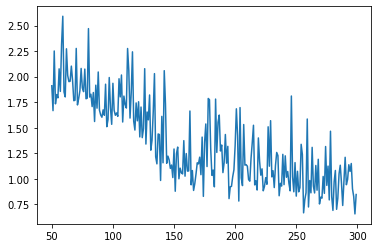

In [85]:
plt.plot(validation_df["Epoch"][50:], validation_df["Validation Relative Error"][50:])